In [1]:
import os
# This line for the Windows
os.add_dll_directory(r"C:\Users\PC\Desktop\openslide-win64-20230414\openslide-win64-20230414\bin")
import datastructure.dataset as dataset
import arguments.setting as setting

In [2]:
data_directories = ["../hamamatsu"]
working_directory = "../workdir/"
csv_file = "../patients.csv"
qupath_project_file = "../qupath_project/project.qpproj"
s = setting.Setting(data_directories, csv_file, working_directory, qupath_project_file)
data = dataset.Dataset(s)

Initial 1560 patients
Resulting in 21 patients
Resulting in 21 patients
Resulting in 21 patients
Resulting in 21 patients


In [3]:
total_tiles = 0
for patient in data.train_set[0]:
    patient.load_wsis()
    for wsi in patient.get_wsis()[0]:
        total_tiles += len(wsi.tiles[0])
print(total_tiles)

145516


In [4]:
import numpy as np

def min_max_image(img):
    img_min = np.min(img, axis = (0, 1))
    img_max = np.max(img, axis = (0, 1))
    return (img - img_min) / (img_max - img_min)

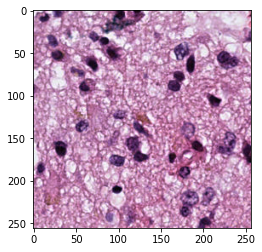

In [5]:
import matplotlib.pyplot as plt

patient = data.get_test_set()[0][0]
patient.load_wsis()
wsi = patient.get_wsis()[0][0]
wsi.load_wsi()
plt.imshow(min_max_image(wsi.tiles[0][0].get_image(wsi.image)))

In [6]:
project = wsi.get_qupath_project()

In [7]:
project._inverse_class_dict

{'Tumor': 0,
 'Hirnparenchym': 1,
 'Infiltrationszone': 2,
 'Blutung': 3,
 'Luftblasen': 4,
 'Haare': 5,
 'Falten': 6,
 'Risse': 7,
 'Nekrosen': 8,
 'Pseudopalisaden': 9,
 'Artefakt': 10,
 'artifiziell verändertes Gewebe': 11,
 'Nekrose und Blutung': 12,
 'Pränekrose': 13,
 'out of focus': 14,
 'Filzstift': 15,
 'Unsicher': 16}

In [8]:
project.images[2].downsample_levels

[{'downsample': 1.0, 'width': 130560, 'height': 105984},
 {'downsample': 2.0, 'width': 65280, 'height': 52992},
 {'downsample': 4.0, 'width': 32640, 'height': 26496},
 {'downsample': 8.0, 'width': 16320, 'height': 13248},
 {'downsample': 16.0, 'width': 8160, 'height': 6624},
 {'downsample': 32.0, 'width': 4080, 'height': 3312},
 {'downsample': 64.0, 'width': 2040, 'height': 1656},
 {'downsample': 128.0, 'width': 1020, 'height': 828},
 {'downsample': 256.0, 'width': 510, 'height': 414}]

C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\tiffslide\tiffslide.py:750: UserWarning: hamamatsu-format metadata parsing only partially implemented!
  return getattr(self, f"parse_{fmt}")()  # type: ignore


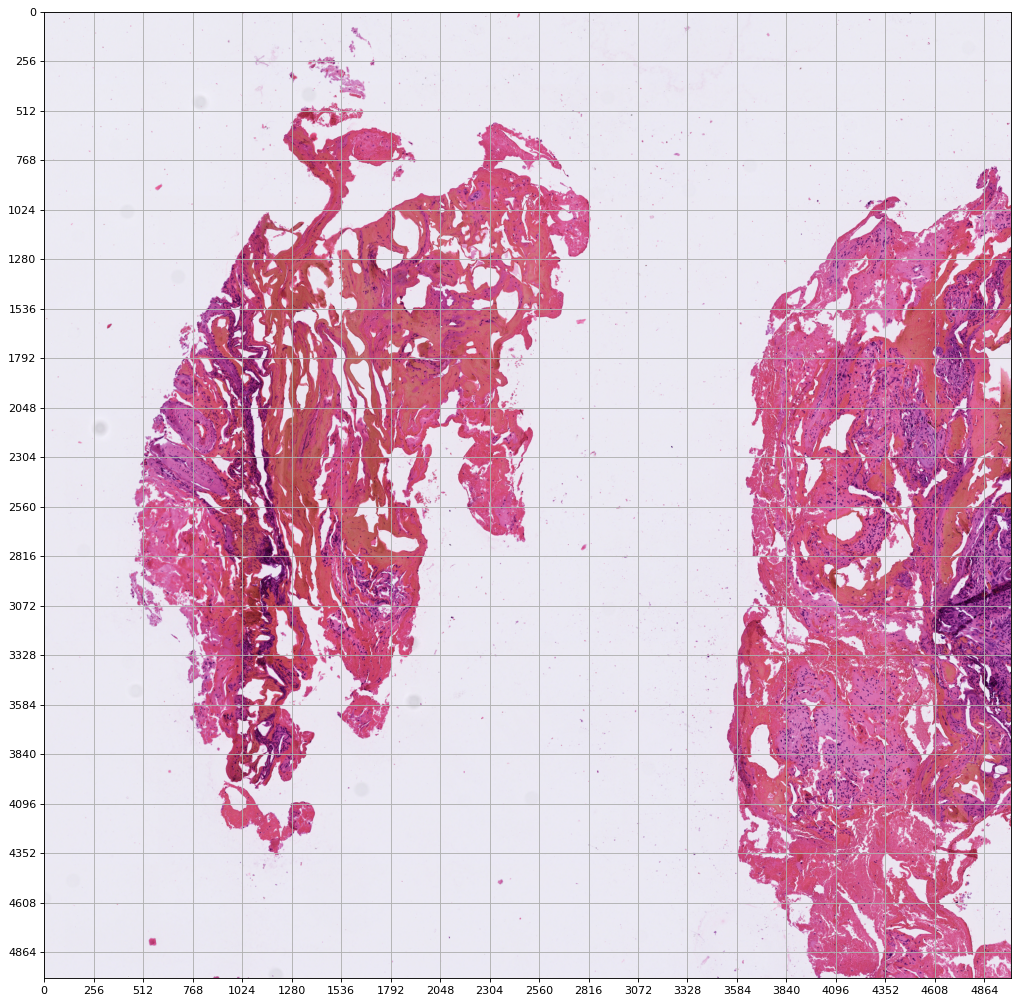

In [9]:
plt.figure(figsize=(16, 16), dpi=80)
major_ticks = np.arange(0, 5000, 256)
plt.xticks(major_ticks)
plt.yticks(major_ticks)
arr = project.get_tile(2, (32640 / 8 + 7000, 26496 / 8 + 9000), (5000, 5000), 2, ret_array = True)
plt.grid(which='both')
plt.imshow(arr)
plt.savefig("example_patches.png")

In [10]:
from histomicstk.preprocessing.color_normalization import reinhard
from histomicstk.saliency.tissue_detection import (
    get_slide_thumbnail, get_tissue_mask)

In [11]:
n_classes = len(wsi.qupath_project.path_classes) - 1

for index, c in enumerate(wsi.qupath_project.path_classes[:-1]):
    print(f"Class {c.name} returned as the channel {(index - 1 - n_classes) % n_classes} in MOTHI")

Class Tumor returned as the channel 15 in MOTHI
Class Hirnparenchym returned as the channel 0 in MOTHI
Class Infiltrationszone returned as the channel 1 in MOTHI
Class Blutung returned as the channel 2 in MOTHI
Class Luftblasen returned as the channel 3 in MOTHI
Class Haare returned as the channel 4 in MOTHI
Class Falten returned as the channel 5 in MOTHI
Class Risse returned as the channel 6 in MOTHI
Class Nekrosen returned as the channel 7 in MOTHI
Class Pseudopalisaden returned as the channel 8 in MOTHI
Class Artefakt returned as the channel 9 in MOTHI
Class artifiziell verändertes Gewebe returned as the channel 10 in MOTHI
Class Nekrose und Blutung returned as the channel 11 in MOTHI
Class Pränekrose returned as the channel 12 in MOTHI
Class out of focus returned as the channel 13 in MOTHI
Class Filzstift returned as the channel 14 in MOTHI


ImageEntries(['B7-18_HE_Hamamatsu_40x.ndpi', 'B9-18_HE_Hamamatsu_40x.ndpi', 'B11-18_HE_Hamamatsu_40x.ndpi', 'B17-19_HE_Hamamatsu_40x.ndpi', 'B20-16_HE_Hamamatsu_40x.ndpi', 'B27-19_HE_Hamamatsu_40x.ndpi', 'B30-18_HE_Hamamatsu_40x.ndpi', 'B35-18_1_HE_Hamamatsu_40x.ndpi', 'B35-18_2_HE_Hamamatsu_40x.ndpi', 'B36-17_1_HE_Hamamatsu_40x.ndpi', 'B36-17_2_HE_Hamamatsu_40x.ndpi', 'B37-17_HE_Hamamatsu_40x.ndpi', 'B42-17_HE_Hamamatsu_40x.ndpi', 'B68-18_HE_Hamamatsu_40x.ndpi', 'B85-17_HE_Hamamatsu_40x.ndpi', 'B100-17_HE_Hamamatsu_40x.ndpi', 'B115-17_HE_Hamamatsu_40x.ndpi', 'B127-19_HE_Hamamatsu_40x.ndpi', 'B128-19_HE_Hamamatsu_40x.ndpi', 'B129-19_HE_Hamamatsu_40x.ndpi', 'B132-17_HE_Hamamatsu_40x.ndpi', 'B138-18_HE_Hamamatsu_40x.ndpi', 'B149-16_HE_Hamamatsu_40x.ndpi', 'B157-17_HE_Hamamatsu_40x.ndpi', 'B162-17_HE_Hamamatsu_40x.ndpi', 'B165-19_HE_Hamamatsu_40x.ndpi', 'B177-18_HE_Hamamatsu_40x.ndpi', 'B178-19_HE_Hamamatsu_40x.ndpi', 'B179-17_HE_Hamamatsu_40x.ndpi', 'B181-16_HE_Hamamatsu_40x.ndpi', 'B187-16_HE_Hamamatsu_40x.ndpi', 'B201-18_HE_Hamamatsu_40x.ndpi', 'B205-09_HE_Hamamatsu_40x.ndpi', 'B205-18_1_HE_Hamamatsu_40x.ndpi', 'B205-18_2_HE_Hamamatsu_40x.ndpi', 'B205-18_HE_Hamamatsu_40x.ndpi', 'B23-18_HE_Hamamatsu_40x-006.ndpi'])
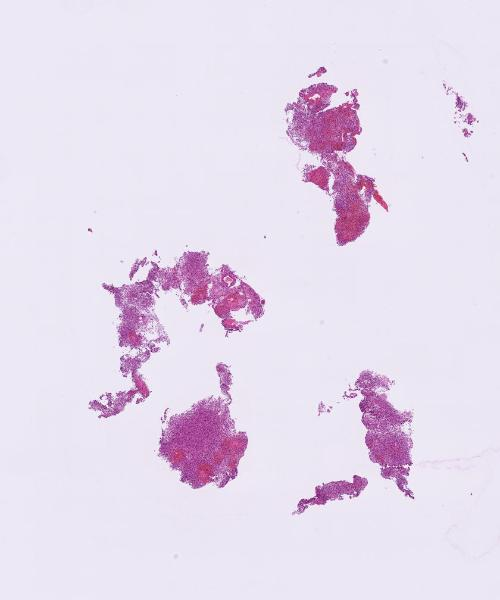
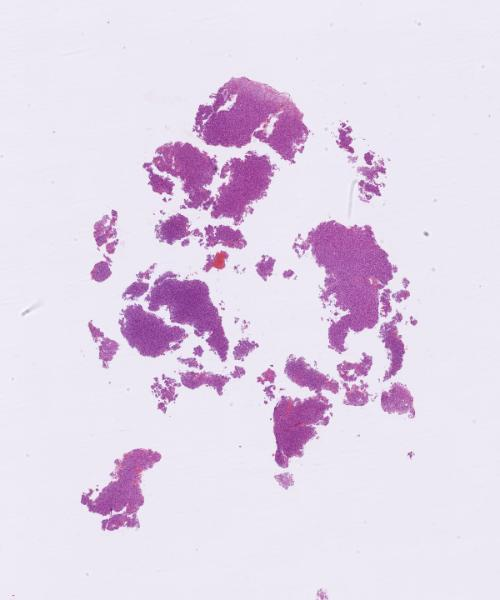
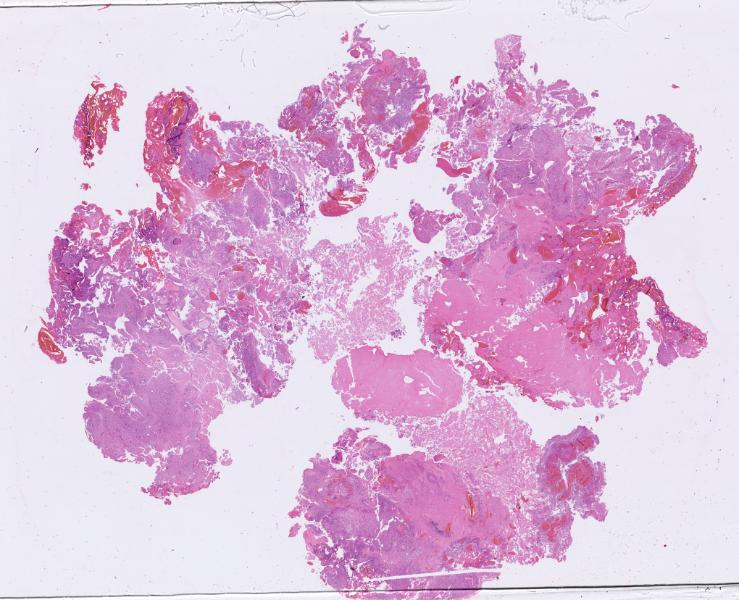
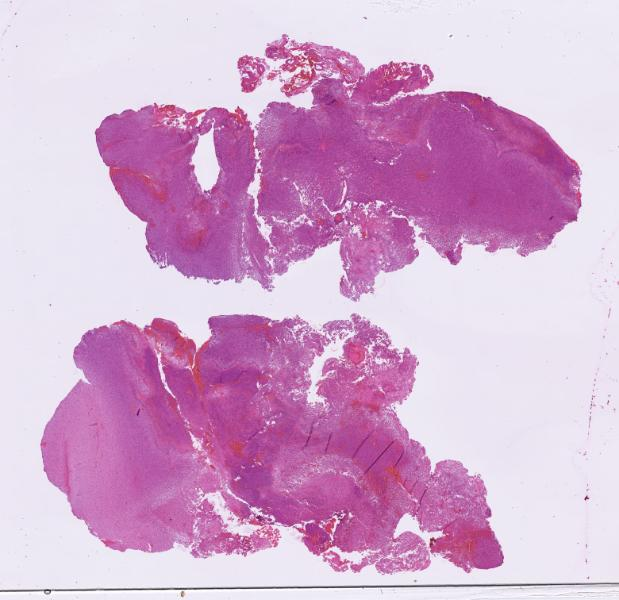
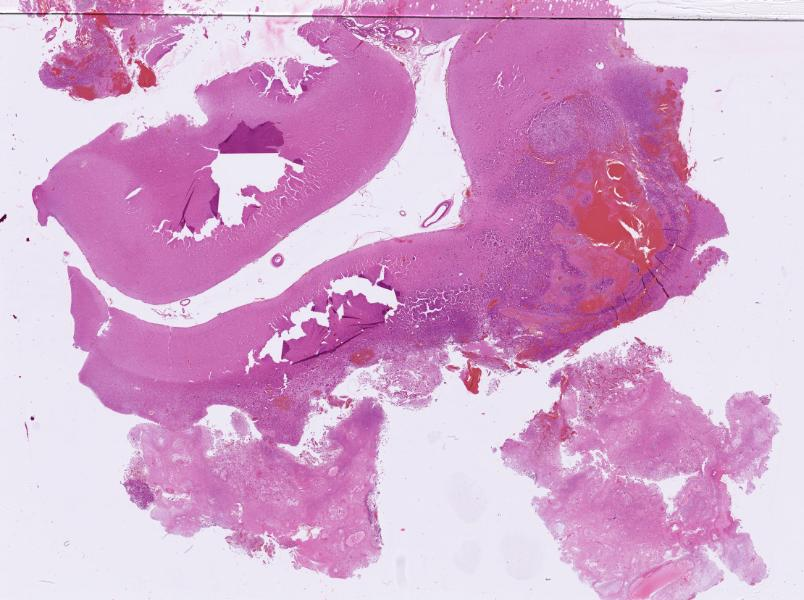
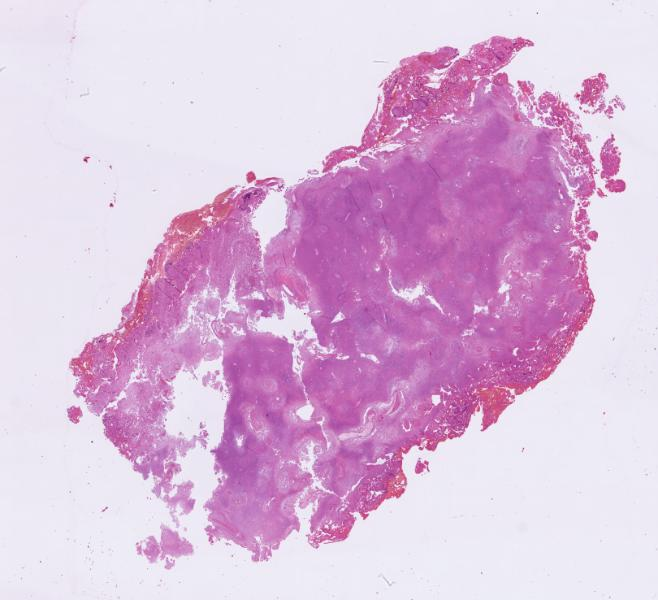
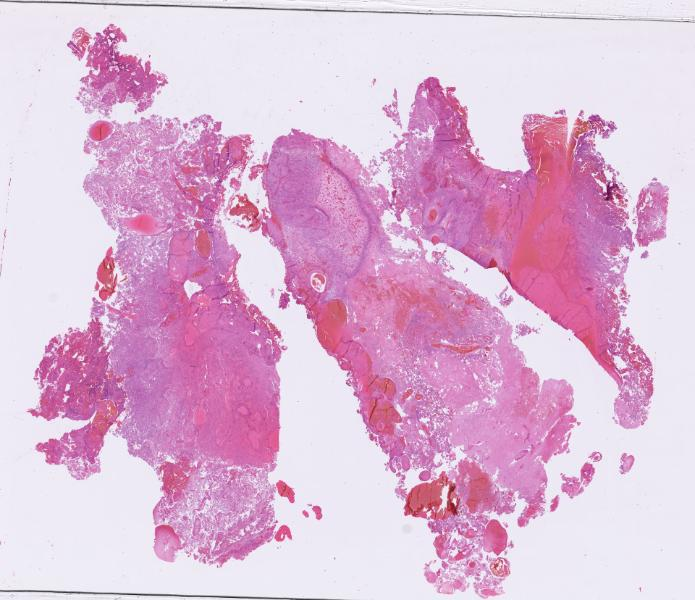
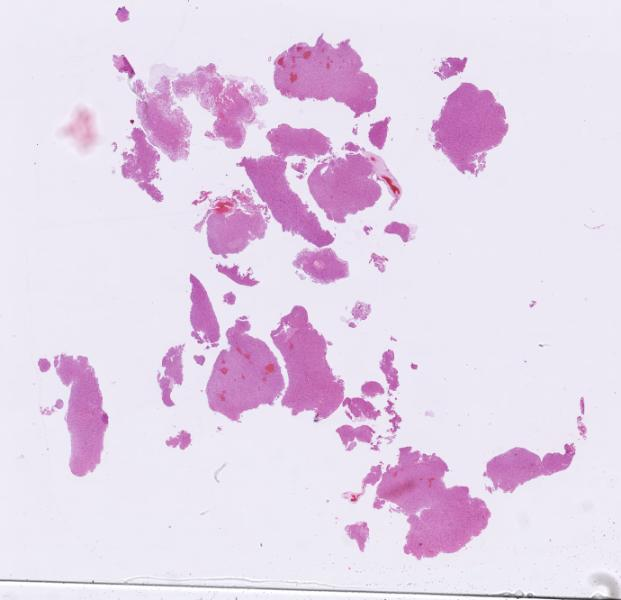
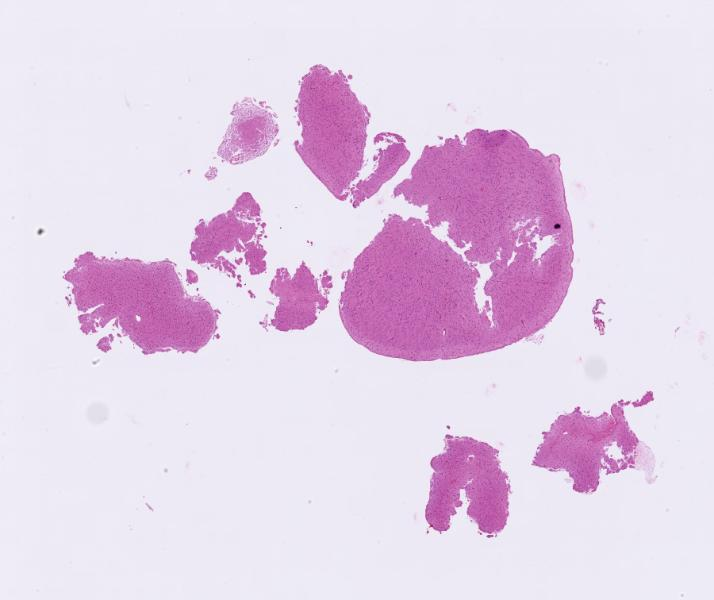
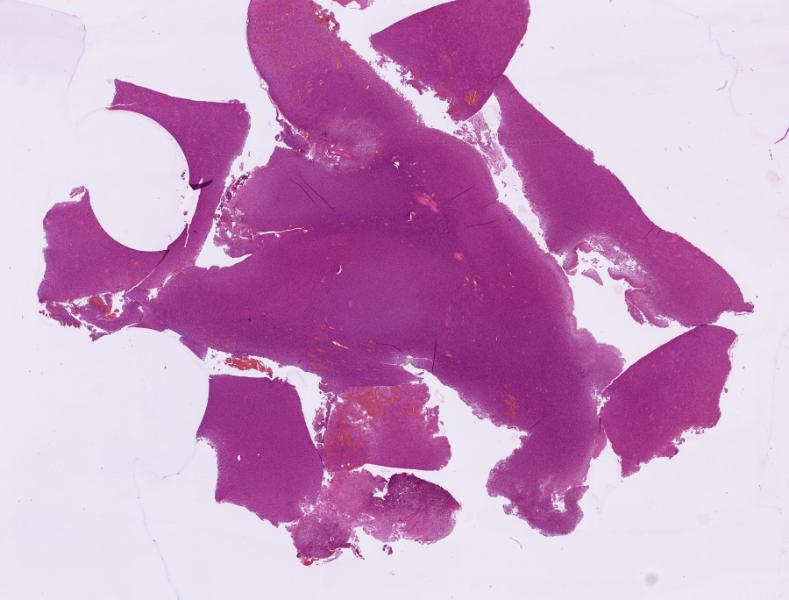
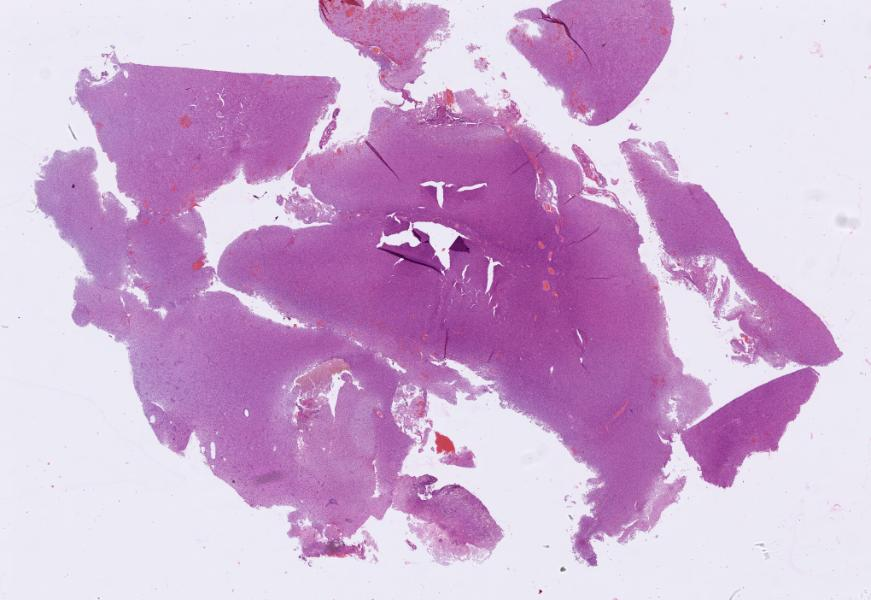
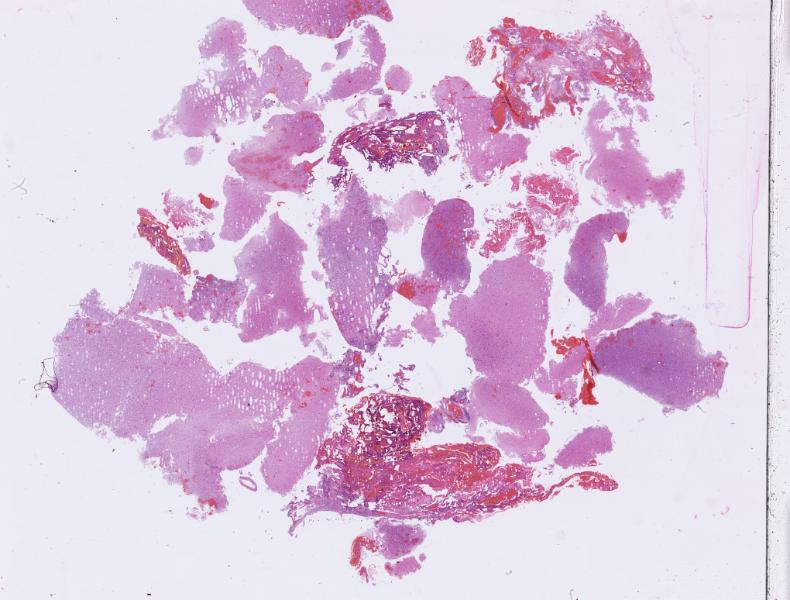
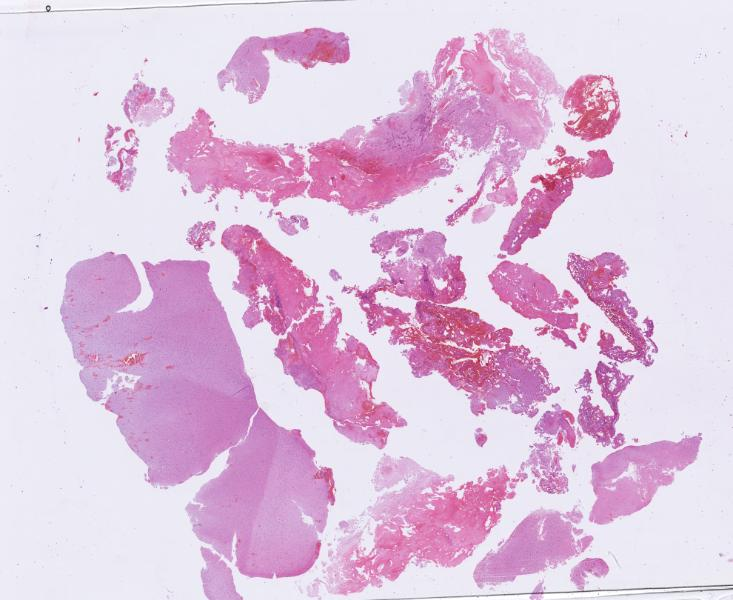
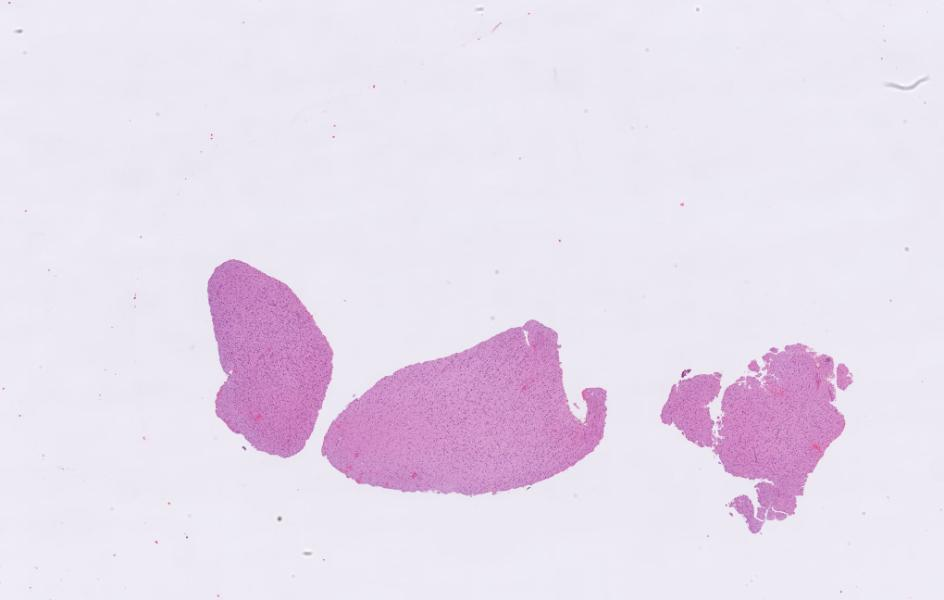
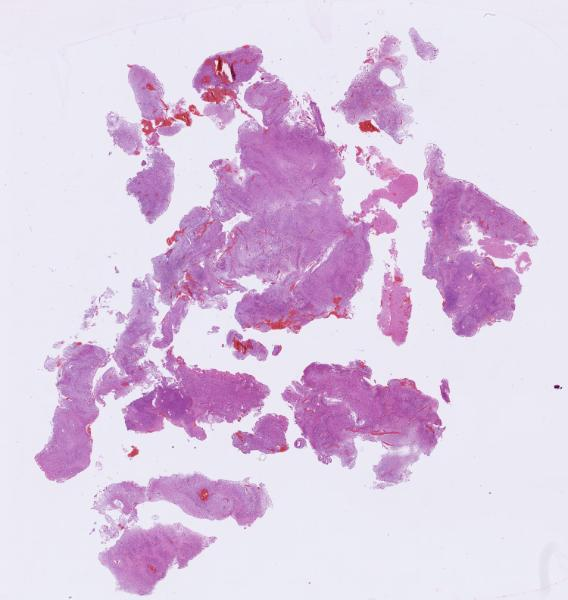
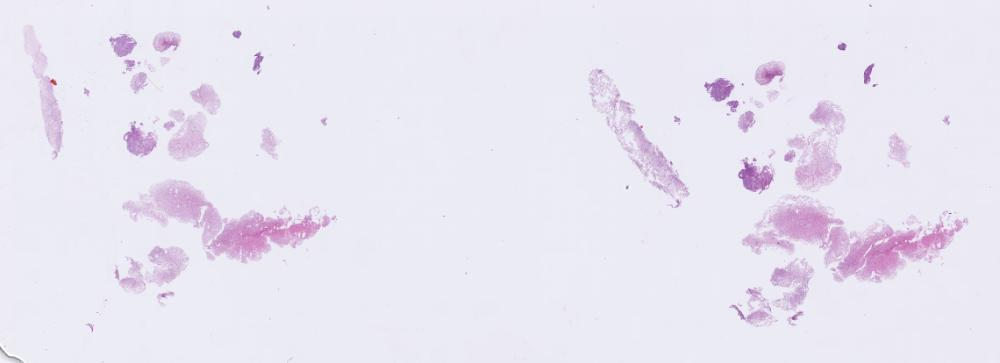
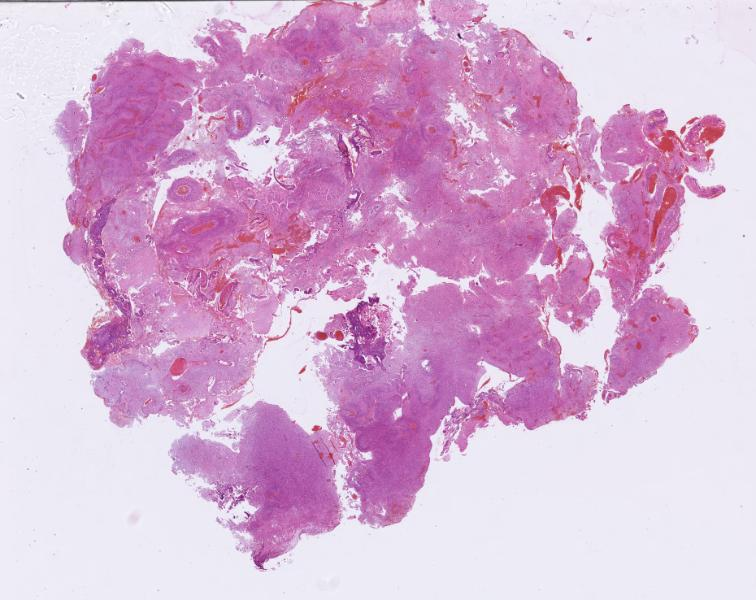
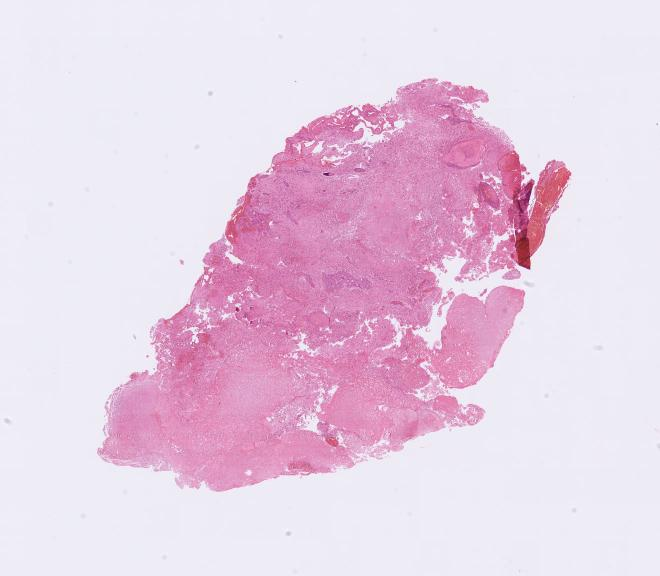
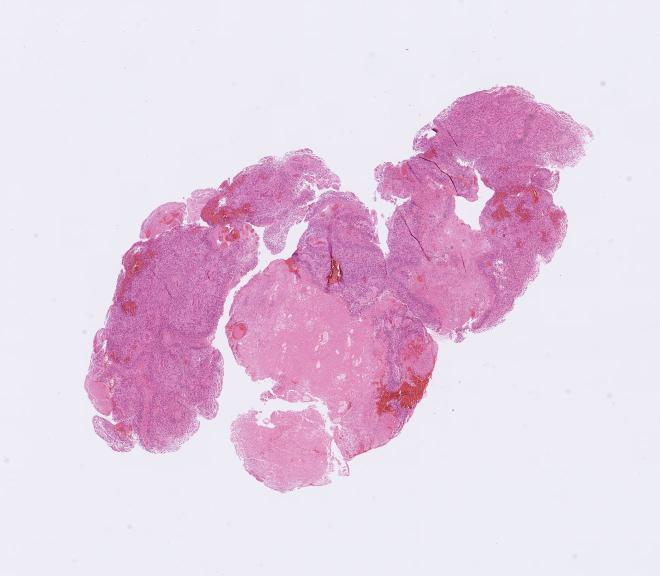
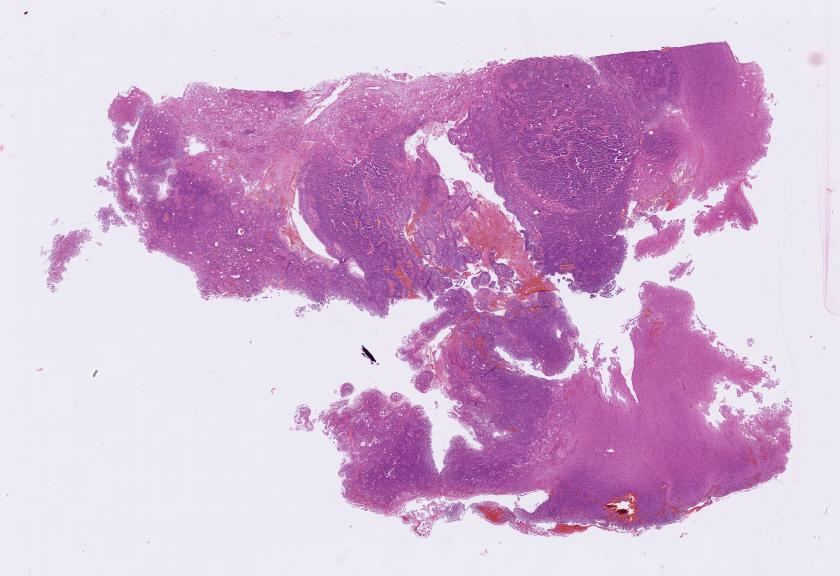
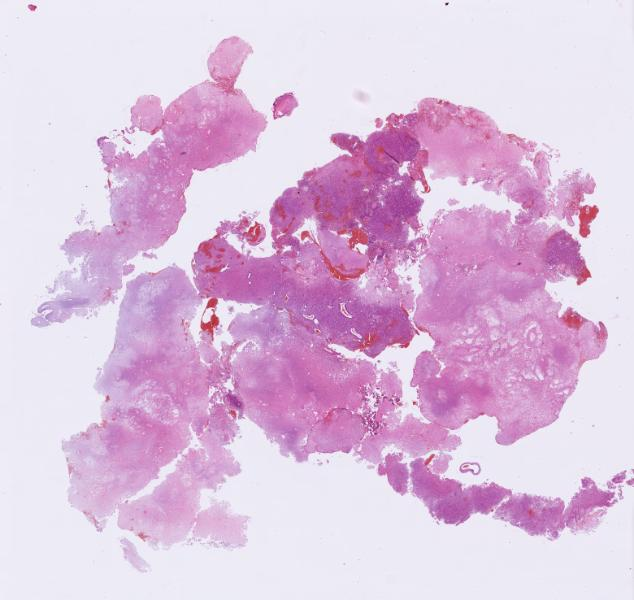
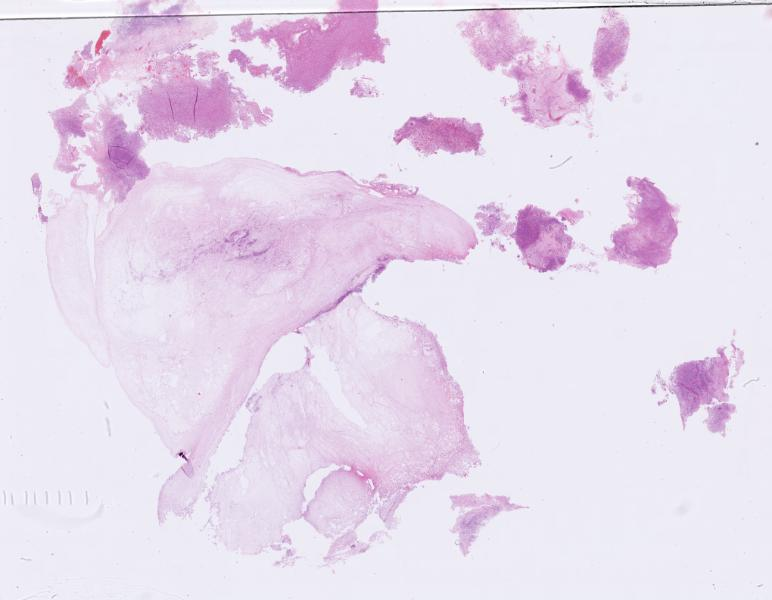
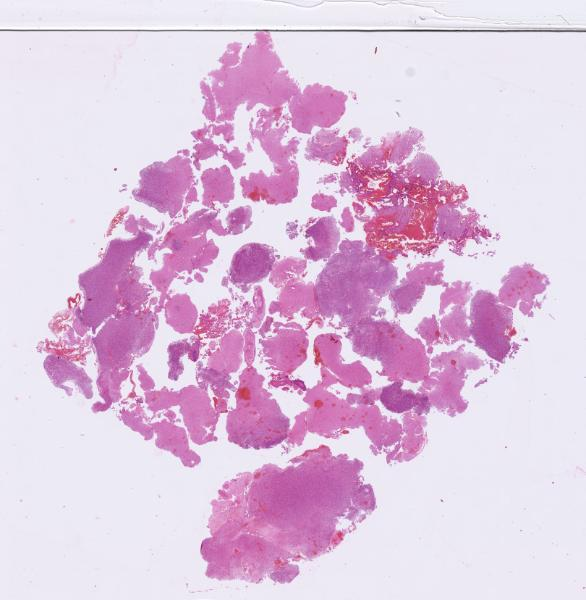
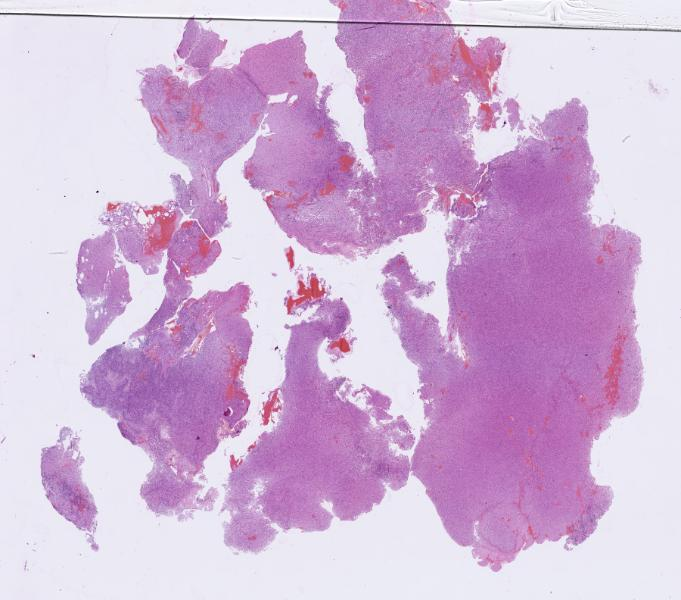
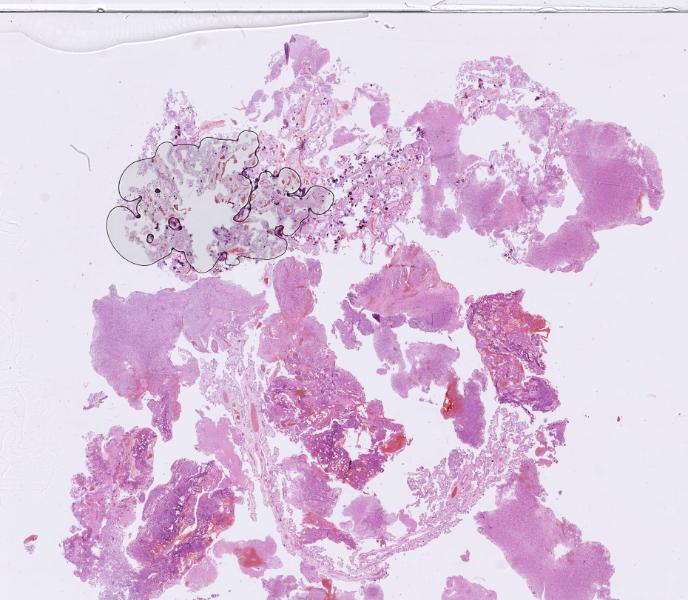
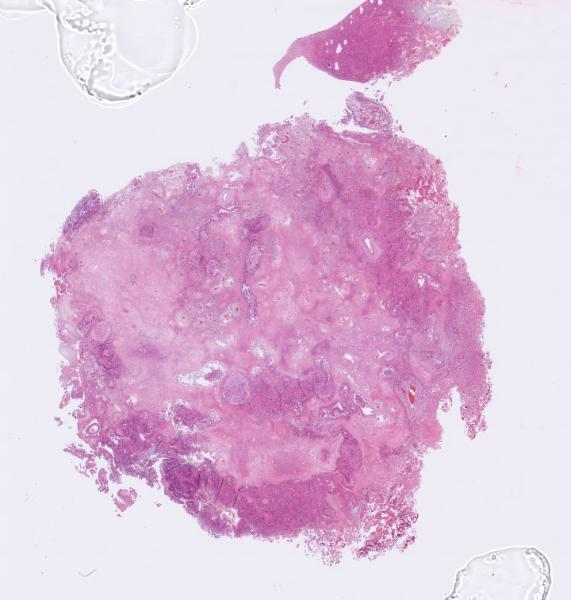
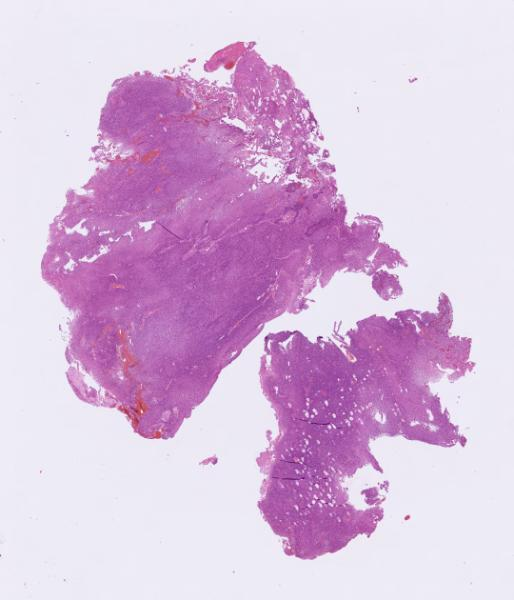
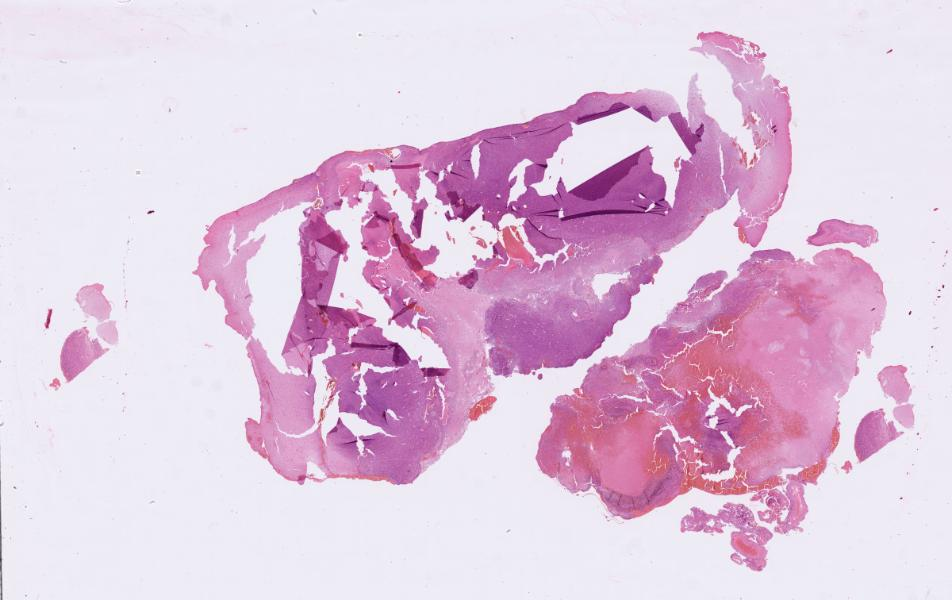
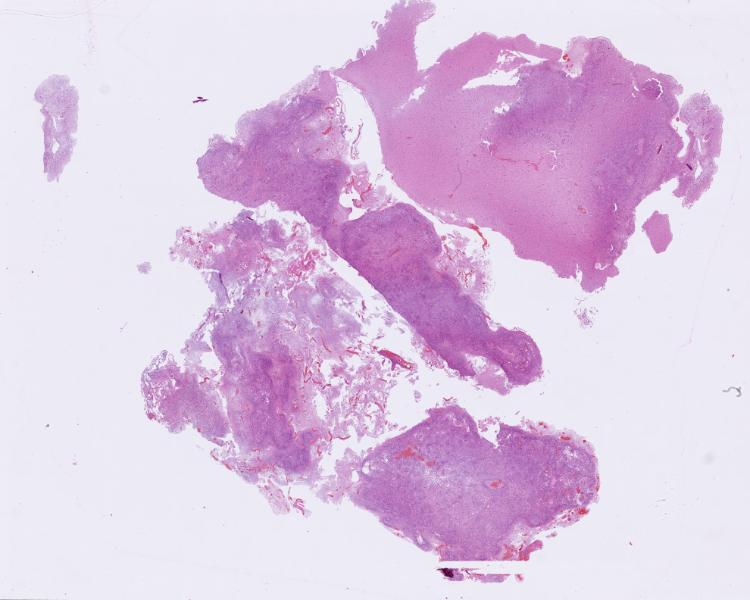
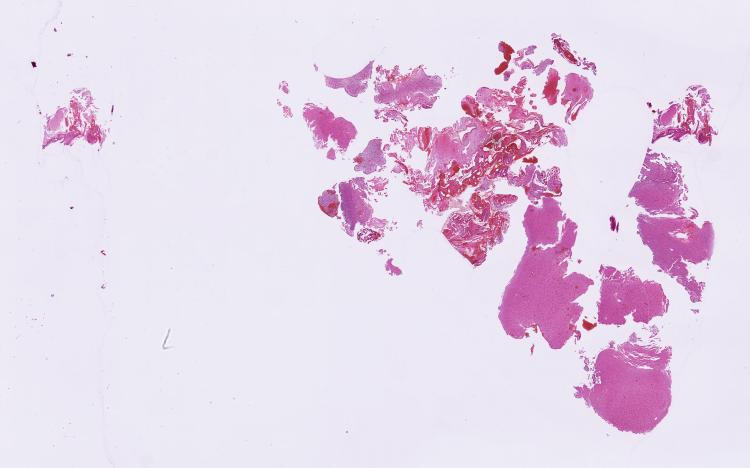
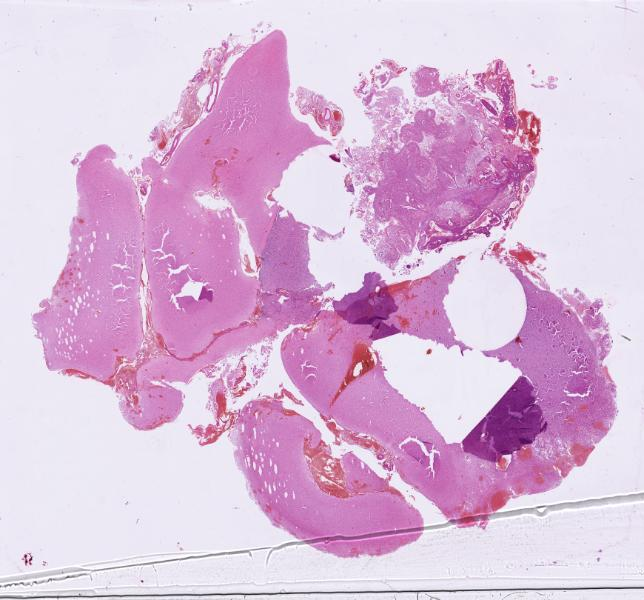
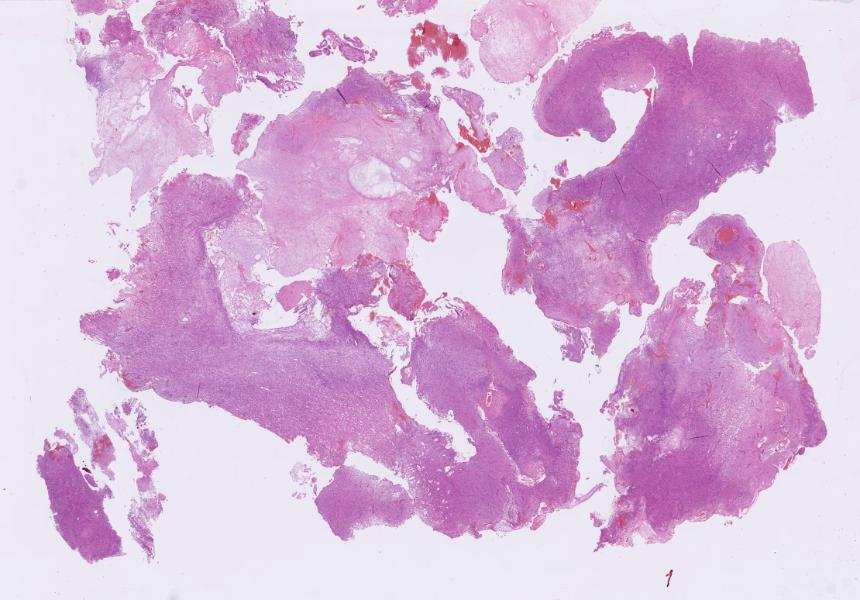
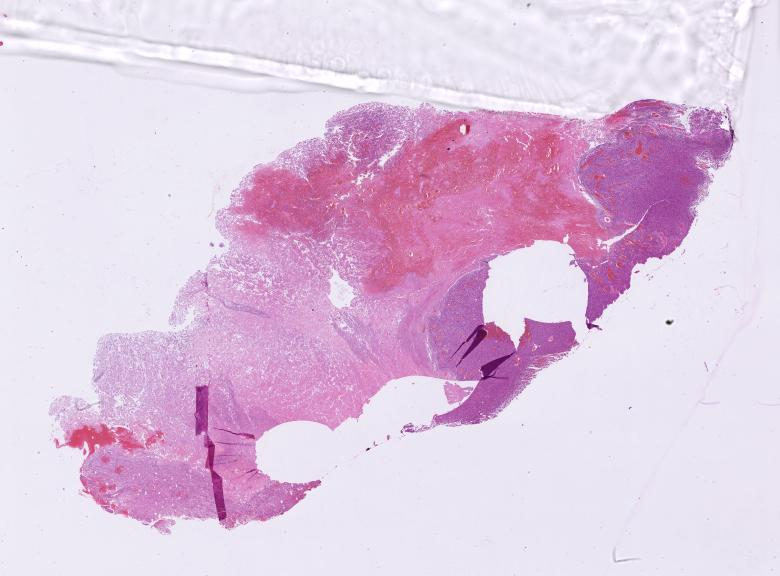
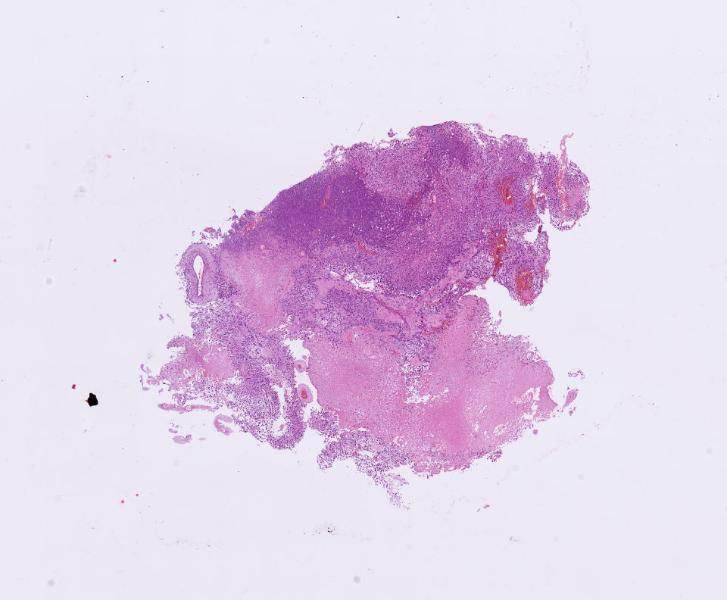
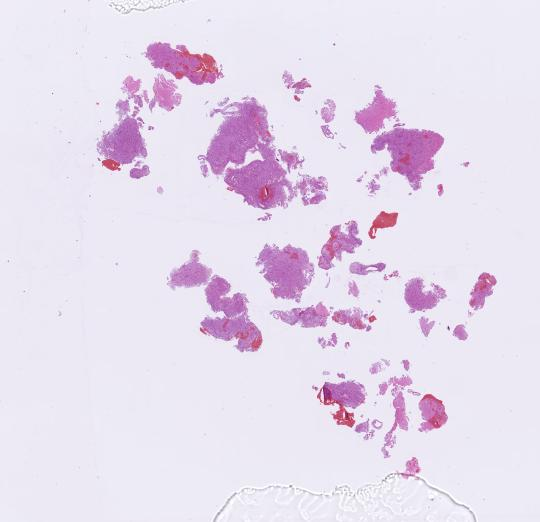
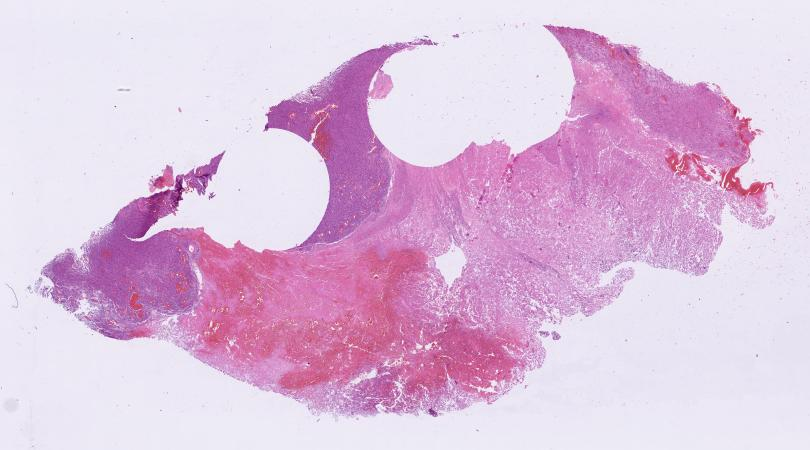
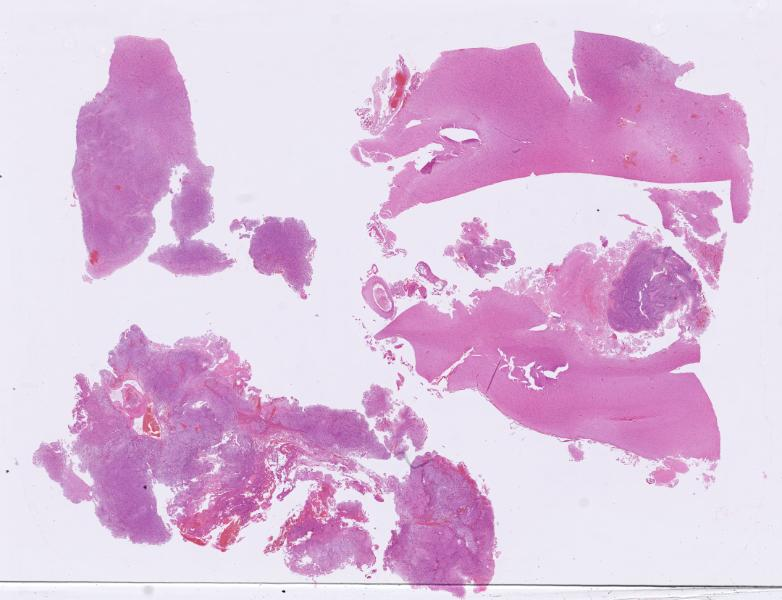

In [12]:
project.images

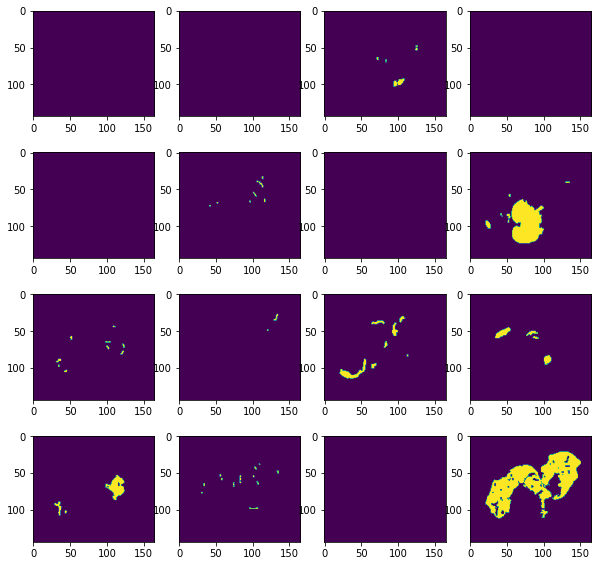

In [13]:
# NOTE: MOTHI shifts the given classes by one to the left.
# Can see that tumor is in the first list in the upper list. 
# Also can check the annotations of the B128-19_HE_Hamamatsu_40x.ndpi from the QuPath project
# But here, it is retrieved as the last element :/

arr = wsi.qupath_project.get_tile_annot_mask(18, (0, 0), (165, 144), 8, multichannel = True)

fig, ax = plt.subplots(4, 4, figsize = (10, 10))
for i in range(16):
    ax[i // 4][i % 4].imshow(arr[i])

In [14]:
patient = data.get_train_set()[0][0]
patient.load_wsis()
wsi = patient.get_wsis()[0][0]
wsi.load_wsi()

tiles_with_masks = []
label_index = 3 # Class Blutung, since it is not multichannel, it is not shifted to the left

for tile in wsi.tiles[0]:
    annotation, _ = tile.get_annotation(wsi)
    if (annotation == label_index + 1).any():
        tiles_with_masks.append([tile, annotation])

In [15]:
wsi.identifier

'B7-18'

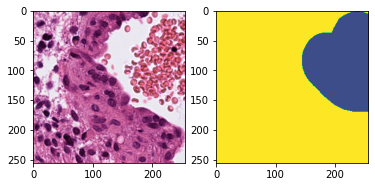

In [16]:
# Explicit example of getting the correct tiles

fig, axes = plt.subplots(1, 2)
axes[0].imshow(min_max_image(tiles_with_masks[0][0].get_image(wsi.image)))
axes[1].imshow(tiles_with_masks[0][1], vmin = 0, vmax = 17) # This tile has the unsure class, it will be ignored during training

In [17]:
patient = data.get_train_set()[0][2]
patient.load_wsis()
wsi = patient.get_wsis()[0][0]
wsi.load_wsi()

tiles_with_masks = []
label_index = 6 # Class Falten 

for tile in wsi.tiles[0]:
    annotation, _ = tile.get_annotation(wsi)
    if (annotation == label_index + 1).any():
        tiles_with_masks.append([tile, annotation])

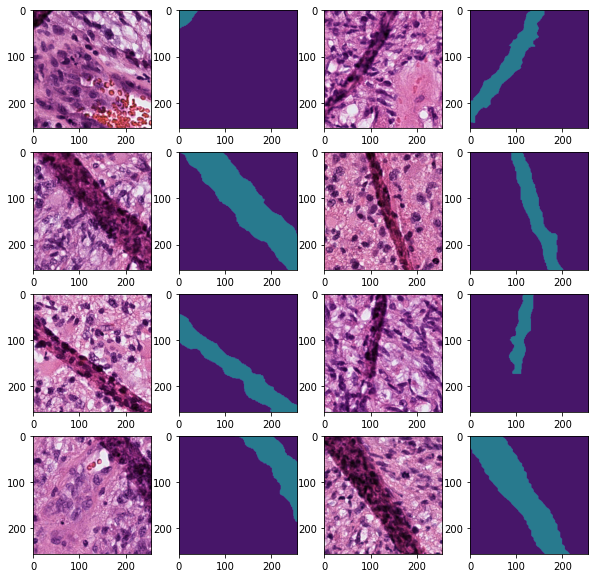

In [18]:
import random

fig, ax = plt.subplots(4, 4, figsize = (10, 10))
for i in range(4):
    tile1 = random.choice(tiles_with_masks)[0]
    tile2 = random.choice(tiles_with_masks)[0]
    ax[i][0].imshow(min_max_image(tile1.get_image(wsi.image)))
    ax[i][1].imshow(tile1.get_annotation(wsi)[0], vmin = 0, vmax = 17)
    ax[i][2].imshow(min_max_image(tile2.get_image(wsi.image)))
    ax[i][3].imshow(tile2.get_annotation(wsi)[0], vmin = 0, vmax = 17)

In [ ]:
from pathlib import Path
import os

def update_qupath_paths(qupath_project, file_folder_path, delete_not_found = False):
    uri2uri = {}
    images = os.listdir(file_folder_path)
    to_be_deleted = []
    for image in qupath_project.images:
        if image.image_name in images:
            old_path = image.uri
            new_path = "file:/" + os.path.join(file_folder_path, image.image_name).replace("\\", "/")
            uri2uri[old_path] = new_path
            print(f"Path of the {image.image_name} has been changed!")
        elif delete_not_found:
            to_be_deleted.append(image)
            print(f"{image.image_name} has been deleted!")
    qupath_project.update_image_paths(uri2uri = uri2uri)
    for image in to_be_deleted:
        qupath_project.remove_image(image)
    qupath_project.save()

In [2]:
from mothi.tiling_projects import QuPathTilingProject
EXAMPLE_PROJECT = r"C:\Users\PC\Downloads\QuPath-Annotations\project.qpproj"
qp_project = QuPathTilingProject(EXAMPLE_PROJECT, mode = "r+")

In [5]:
# WARNING DO NOT RUN THIS, IT UPDATES THE QUPATH PROJECT ACCORDING TO GIVEN FOLDER
# update_qupath_paths(qp_project, r"C:\Users\PC\Desktop\TestGBM\Max_Pathology\hamamatsu", delete_not_found = True)

Path of the B7-18_HE_Hamamatsu_40x.ndpi has been changed!
Path of the B9-18_HE_Hamamatsu_40x.ndpi has been changed!
Path of the B11-18_HE_Hamamatsu_40x.ndpi has been changed!
Path of the B17-19_HE_Hamamatsu_40x.ndpi has been changed!
Path of the B20-16_HE_Hamamatsu_40x.ndpi has been changed!
B23-18_HE_Hamamatsu_40x.ndpi has been deleted!
Path of the B27-19_HE_Hamamatsu_40x.ndpi has been changed!
B28-19_HE_Hamamatsu_40x.ndpi has been deleted!
Path of the B30-18_HE_Hamamatsu_40x.ndpi has been changed!
Path of the B35-18_1_HE_Hamamatsu_40x.ndpi has been changed!
Path of the B35-18_2_HE_Hamamatsu_40x.ndpi has been changed!
Path of the B36-17_1_HE_Hamamatsu_40x.ndpi has been changed!
Path of the B36-17_2_HE_Hamamatsu_40x.ndpi has been changed!
Path of the B37-17_HE_Hamamatsu_40x.ndpi has been changed!
Path of the B42-17_HE_Hamamatsu_40x.ndpi has been changed!
Path of the B68-18_HE_Hamamatsu_40x.ndpi has been changed!
Path of the B85-17_HE_Hamamatsu_40x.ndpi has been changed!
Path of the B10

In [ ]:
# Following parts will be updated since changed the model's output channels and MOTHI setting is not multichannel

In [39]:
from datastructure import dataset_torch
import torch
import numpy as np

@torch.no_grad()
def infer_qupath(img_id, model, qupath_project, norm_function = None, level = 2, 
                 n_channels = 1, patch_size = 256, device = "cpu"):
    image = qupath_project.images[img_id]
    downsample, width, height = image.downsample_levels[level].values()
    max_width, max_height = image.width, image.height
    annotations = np.zeros((height, width, n_channels))
    tile_arr = []
    for x in range(0, width, patch_size):
        for y in range(0, height, patch_size):
            tile_width = min(patch_size, width - x)
            tile_height = min(patch_size, height - y)
            tile = qupath_project.get_tile(img_id, (x * (2 ** level), y * (2 ** level)), 
                                           size = (tile_width,
                                                   tile_height),
                                           downsample_level = level)
            if norm_function:
                tile = norm_function(tile)
            tile_padded = np.zeros((patch_size, patch_size, tile.shape[2]), dtype = np.float32)
            tile_padded[:tile.shape[0], :tile.shape[1]] = tile
            tile_model_sample = torch.tensor(np.transpose(tile_padded[None], [0, 3, 1, 2]), dtype = torch.float).to(device)
            inter = model(tile_model_sample).cpu().numpy()
            logits = inter[0]
            annotations[y : y + tile_height, x : x + tile_width] = (np.transpose(logits, [1, 2, 0]) > 0).astype(int)[:tile_height, :tile_width]
    return image, annotations

In [35]:
# THis Part is for testing and can be ignored. We can load the model and visualize our models predictions using the upper function

from models import unet

import torch

#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = "cpu"
torch.cuda.empty_cache()
model = unet.UNet(3,
                      1,
                      5,
                      6,
                      True,
                      True,
                      'upconv')

model.to(device)

UNet(
  (down_path): ModuleList(
    (0): UNetConvBlock(
      (block): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): ReLU()
        (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): ReLU()
        (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): UNetConvBlock(
      (block): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): ReLU()
        (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): ReLU()
        (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): UNetConv

In [40]:
a = infer_qupath(13, model, project, level = 7)

In [23]:
from datastructure import dataset_torch

import importlib
importlib.reload(dataset_torch)

dataset = dataset_torch.PathologyDataset(data.get_validation_set(), infer = False)

In [24]:
dataset.classes

['Tumor',
 'Hirnparenchym',
 'Infiltrationszone',
 'Blutung',
 'Luftblasen',
 'Haare',
 'Falten',
 'Risse',
 'Nekrosen',
 'Pseudopalisaden',
 'Artefakt',
 'artifiziell verändertes Gewebe',
 'Nekrose und Blutung',
 'Pränekrose',
 'out of focus',
 'Filzstift']

In [5]:
import random

# tumor are in tiles / total area
m = 0
for i in range(1000):
    m += dataset[random.randint(0, 11669)][1].mean()
print(m / 1000)

0.43557037353515626


In [ ]:
# This cell infers dataset, will be a function

batch_size = 8
save_dir = r"C:\Users\PC\Desktop\infer_test"
patch_size = 256
device = "cuda"

a = torch.utils.data.DataLoader(dataset, pin_memory = True, batch_size = batch_size, infer = True)

b = 0

n_channels = 1
ann_mask = None

model = model.to(device)

for tiles, size, level, identifier, position in a:
    if ann_mask is None:
        ann_mask = np.zeros((n_channels, size[0][0], size[1][0]), dtype = np.uint8)
        current_level = level[0]
        current_identifier = identifier[0]
        current_size = (size[0][0], size[1][0])
    tiles = tiles.to(device)
    pred = model(tiles).detach().cpu().numpy()
    pred_map = (pred > 0).astype(np.uint8)
    for i in range(batch_size):
        if identifier[i] != current_identifier:
            np.save(f"{current_identifier}_{current_level}.npy", ann_mask)
            current_level = level[i]
            current_identifier = identifier[i]
            current_size = (size[0][i], size[1][i])
            ann_mask = np.zeros((n_channels, size[0][i], size[1][i]), dtype = np.uint8)
        pos_x = position[0][i]
        width = min(patch_size, current_size[0] - pos_x)
        pos_y = position[1][i]
        height = min(patch_size, current_size[1] - pos_y)
        ann_mask[:, pos_x : pos_x + width, pos_y : pos_y + height] = np.transpose(pred_map[i], [0, 2, 1])[:, :width, :height]

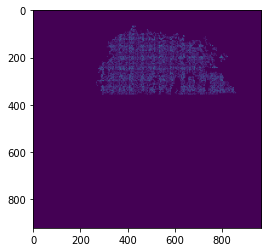

In [159]:
# infering only the tiles
# No weights are loaded, hence it is random
plt.imshow(ann_mask[0, ::100, ::100])